# t-sne 觀察 : 分群

# [教學目標]
- 觀察雙同心圓使用 t-SNE 在不同困惑度 (perplexity) 下的分群效果  
- 因為非監督模型的效果, 較難以簡單的範例看出來  
  所以非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,  
  同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

# [範例重點]
- 使用同心圓的資料, 觀察 t-sne 在不同困惑度 (perplexity) 下, 分群的效果如何變化 (In[4], Out[4])

In [5]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [6]:
n_samples = 300
n_components = 2
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

x, y = datasets.make_circles(n_samples = n_samples, factor = 0.5, noise = 0.05)
red = (y == 0)
green = (y == 1)

 Circles, preplexity : 4 in 0.9047491550445557 sec
 Circles, preplexity : 6 in 0.8777909278869629 sec
 Circles, preplexity : 9 in 0.8856761455535889 sec
 Circles, preplexity : 14 in 0.9354467391967773 sec
 Circles, preplexity : 21 in 1.0352230072021484 sec
 Circles, preplexity : 30 in 1.0998589992523193 sec
 Circles, preplexity : 45 in 1.2430977821350098 sec
 Circles, preplexity : 66 in 1.5152909755706787 sec
 Circles, preplexity : 100 in 1.657912254333496 sec


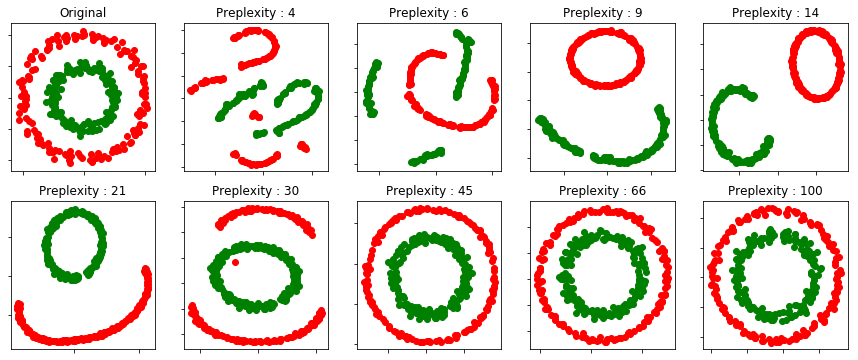

In [7]:
(fig, subplots) = plt.subplots(2,5, figsize = (15,6) )
ax = subplots[0][0]
ax.set_title('Original')
ax.scatter(x[red,0], x[red,1] , c = 'r')
ax.scatter(x[green, 0], x[green, 1], c = 'g')
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    if i < 4:
        ax = subplots[0][i+1]
    else :
        ax = subplots[1][i-4]
    
    t0 = time()
    tsne = manifold.TSNE(n_components = n_components, init = 'random', random_state = 0, perplexity = perplexity)
    x_tsne = tsne.fit_transform(x)
    t1 = time()
    
    print(f' Circles, preplexity : {perplexity} in {t1-t0} sec')
    ax.set_title(f'Preplexity : {perplexity}')
    ax.scatter(x_tsne[red, 0], x_tsne[red, 1], c = 'r')
    ax.scatter(x_tsne[green, 0], x_tsne[green, 1], c = 'g')
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
plt.show()

t-sne 觀察 : 流形還原
[作業目標]
試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果 

[作業重點]
使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 
Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

In [8]:
n_samples = 300
n_components = 2
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]
x, color = datasets.samples_generator.make_s_curve(n_samples = n_samples, random_state = 0)

 Circles, preplexity : 4 in 0.9318172931671143 sec
 Circles, preplexity : 6 in 0.9360389709472656 sec
 Circles, preplexity : 9 in 1.0129401683807373 sec
 Circles, preplexity : 14 in 1.0126850605010986 sec
 Circles, preplexity : 21 in 1.1461708545684814 sec
 Circles, preplexity : 30 in 1.1884779930114746 sec
 Circles, preplexity : 45 in 1.3080649375915527 sec
 Circles, preplexity : 66 in 1.1728930473327637 sec
 Circles, preplexity : 100 in 1.7937180995941162 sec


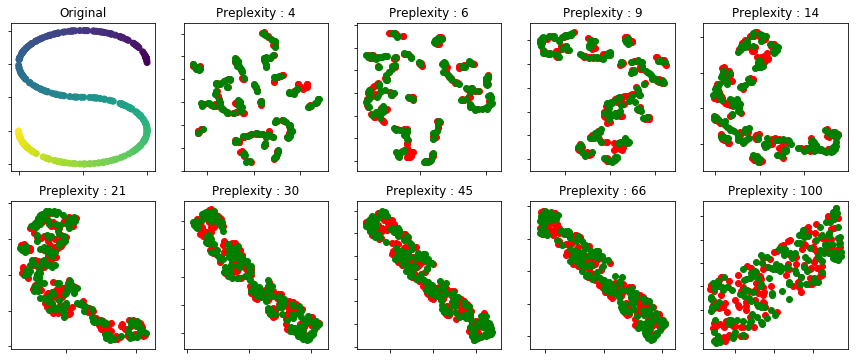

In [12]:
(fig, subplots) = plt.subplots(2, 5, figsize = (15,6))

ax = subplots[0][0]
ax.set_title('Original')
ax.scatter(x[:, 0], x[:,2], c = color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    if i < 4:
        ax = subplots[0][i+1]
    else :
        ax = subplots[1][i-4]
    
    t0 = time()
    tsne = manifold.TSNE(n_components = n_components, init = 'random', random_state = 0, perplexity = perplexity)
    x_tsne = tsne.fit_transform(x)
    t1 = time()
    
    print(f' Circles, preplexity : {perplexity} in {t1-t0} sec')
    ax.set_title(f'Preplexity : {perplexity}')
    ax.scatter(x_tsne[red, 0], x_tsne[red, 1], c = 'r')
    ax.scatter(x_tsne[green, 0], x_tsne[green, 1], c = 'g')
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
plt.show()

 Circles, preplexity : 4 in 0.9197120666503906 sec
 Circles, preplexity : 6 in 0.9256319999694824 sec
 Circles, preplexity : 9 in 0.997560977935791 sec
 Circles, preplexity : 14 in 0.9963641166687012 sec
 Circles, preplexity : 21 in 1.1483440399169922 sec
 Circles, preplexity : 30 in 1.1895461082458496 sec
 Circles, preplexity : 45 in 1.310878038406372 sec
 Circles, preplexity : 66 in 1.1574761867523193 sec
 Circles, preplexity : 100 in 1.74391508102417 sec


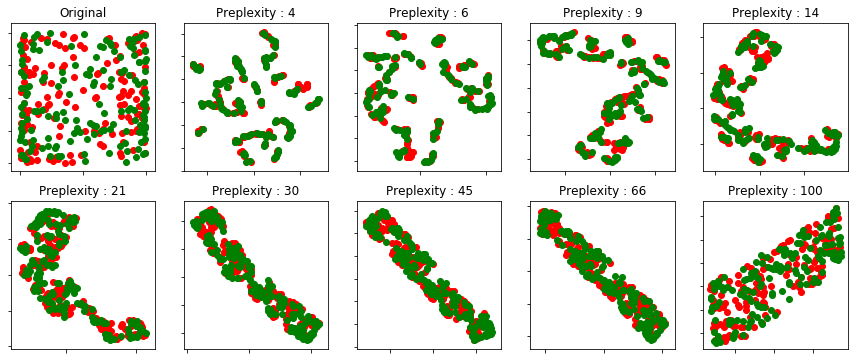

In [9]:
(fig, subplots) = plt.subplots(2,5, figsize = (15,6) )
ax = subplots[0][0]
ax.set_title('Original')
ax.scatter(x[red,0], x[red,1] , c = 'r')
ax.scatter(x[green, 0], x[green, 1], c = 'g')
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    if i < 4:
        ax = subplots[0][i+1]
    else :
        ax = subplots[1][i-4]
    
    t0 = time()
    tsne = manifold.TSNE(n_components = n_components, init = 'random', random_state = 0, perplexity = perplexity)
    x_tsne = tsne.fit_transform(x)
    t1 = time()
    
    print(f' Circles, preplexity : {perplexity} in {t1-t0} sec')
    ax.set_title(f'Preplexity : {perplexity}')
    ax.scatter(x_tsne[red, 0], x_tsne[red, 1], c = 'r')
    ax.scatter(x_tsne[green, 0], x_tsne[green, 1], c = 'g')
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
plt.show()